In [ ]:
pip install wordcloud

In [ ]:
pip install prettytable

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [ ]:
#dataset = pd.read_csv('IMDB Dataset.csv')
#dataset = dataset.iloc[:10000, :]

# Random Sampling

In [ ]:
# Read the dataset
dataset = pd.read_csv('IMDB Dataset.csv')

# Perform random sampling
dataset = dataset.sample(n=10000, random_state=42)  # Adjust the value of n as needed

# Reset index
dataset.reset_index(drop=True, inplace=True)

In [ ]:
dataset

,review,sentiment
0,I really liked this Summerslam due to the look...,positive
1,Not many television shows appeal to quite as m...,positive
2,The film quickly gets to a major chase scene w...,negative
3,Jane Austen would definitely approve of this o...,positive
4,Expectations were somewhat high for me when I ...,negative
...,...,...
9995,Although Casper van Dien and Michael Rooker ar...,negative
9996,I liked this movie. I wasn't really sure what ...,positive
9997,Yes non-Singaporean's can't see what's the big...,positive
9998,"As far as films go, this is likable enough. En...",negative


In [ ]:
print("Dataset Shape:\n", dataset.shape)
print()
print("Dataset top 5 columns:\n", dataset.head())
print()
print("Label Analysis:\n",dataset['sentiment'].value_counts())

Dataset Shape:
 (10000, 2)

Dataset top 5 columns:
                                               review sentiment
0  I really liked this Summerslam due to the look...  positive
1  Not many television shows appeal to quite as m...  positive
2  The film quickly gets to a major chase scene w...  negative
3  Jane Austen would definitely approve of this o...  positive
4  Expectations were somewhat high for me when I ...  negative

Label Analysis:
 sentiment
positive    5039
negative    4961
Name: count, dtype: int64


In [ ]:
print("General Info: \n", dataset.describe())

General Info: 
                                                    review sentiment
count                                               10000     10000
unique                                               9978         2
top     You would probably get something like this. I'...  positive
freq                                                    2      5039


In [ ]:
dataset.nunique() # Unqiue values

review       9978
sentiment       2
dtype: int64

In [ ]:
dataset.isnull().sum() # NULL finding

review       0
sentiment    0
dtype: int64

In [ ]:
print("Number Of Duplicates:", dataset.duplicated().sum())
dataset.drop_duplicates(inplace = True)
print("Number Of Duplicates after drop:", dataset.duplicated().sum())

Number Of Duplicates: 22
Number Of Duplicates after drop: 0


# Text Preprocessing

## Convert to lowercase

In [ ]:
dataset['review'] = dataset['review'].apply(lambda x:x.lower())

## Text Cleansing

### Removing HTML Tags

In [ ]:
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'),"",raw_text)
    return cleaned_text
dataset['review'] = dataset['review'].apply(remove_tags)

### Remove URLs

In [ ]:
def remove_urls(raw_text):
    cleaned_text = re.sub(r'http[s]?://\S+', '', raw_text)
    return cleaned_text

# Apply the function to your dataset
dataset['review'] = dataset['review'].apply(remove_urls)

### Remove Punctuation

In [ ]:
def remove_punctuation(text):
    for c in string.punctuation:
        text = text.replace(c,'')
    return text
dataset['review'] = dataset['review'].apply(remove_punctuation)

## Stopword Removal

In [ ]:
import nltk
nltk.download('stopwords')
sw_list = stopwords.words('english')
dataset['review'] = dataset['review'].apply(
    lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Tokenization

In [ ]:
# Tokenize the sentence
import nltk
nltk.download('punkt')
dataset['tokenized_words'] = dataset['review'].apply(lambda sentence: word_tokenize(sentence))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dataset['tokenized_words'][0]

['really',
 'liked',
 'summerslam',
 'due',
 'look',
 'arena',
 'curtains',
 'look',
 'overall',
 'interesting',
 'reason',
 'anyways',
 'could',
 'one',
 'best',
 'summerslams',
 'ever',
 'wwf',
 'didnt',
 'lex',
 'luger',
 'main',
 'event',
 'yokozuna',
 'time',
 'ok',
 'huge',
 'fat',
 'man',
 'vs',
 'strong',
 'man',
 'im',
 'glad',
 'times',
 'changed',
 'terrible',
 'main',
 'event',
 'like',
 'every',
 'match',
 'luger',
 'terrible',
 'matches',
 'card',
 'razor',
 'ramon',
 'vs',
 'ted',
 'dibiase',
 'steiner',
 'brothers',
 'vs',
 'heavenly',
 'bodies',
 'shawn',
 'michaels',
 'vs',
 'curt',
 'hening',
 'event',
 'shawn',
 'named',
 'big',
 'monster',
 'body',
 'guard',
 'diesel',
 'irs',
 'vs',
 '123',
 'kid',
 'bret',
 'hart',
 'first',
 'takes',
 'doink',
 'takes',
 'jerry',
 'lawler',
 'stuff',
 'harts',
 'lawler',
 'always',
 'interesting',
 'ludvig',
 'borga',
 'destroyed',
 'marty',
 'jannetty',
 'undertaker',
 'took',
 'giant',
 'gonzalez',
 'another',
 'terrible',
 'm

## Stemming

In [ ]:
# # Initialize the PorterStemmer
# stemmer = PorterStemmer()

# # Stemming function
# def stem_tokens(tokens):
#     return [stemmer.stem(token) for token in tokens]

# dataset['tokenized_words'] = dataset['tokenized_words'].apply(stem_tokens)

## Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens with POS tagging
def lemmatize_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)  # Perform POS tagging
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        # Convert POS tag to WordNet POS tag
        wn_tag = nltk.corpus.wordnet.NOUN
        if tag.startswith('J'):
            wn_tag = nltk.corpus.wordnet.ADJ
        elif tag.startswith('V'):
            wn_tag = nltk.corpus.wordnet.VERB
        elif tag.startswith('R'):
            wn_tag = nltk.corpus.wordnet.ADV
        # Lemmatize token with POS tag
        lemma = lemmatizer.lemmatize(token, pos=wn_tag)
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

# Apply lemmatization to your dataset column
dataset['tokenized_words'] = dataset['tokenized_words'].apply(lemmatize_with_pos)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
dataset['tokenized_words'][0]

['really',
 'liked',
 'summerslam',
 'due',
 'look',
 'arena',
 'curtain',
 'look',
 'overall',
 'interesting',
 'reason',
 'anyways',
 'could',
 'one',
 'best',
 'summerslams',
 'ever',
 'wwf',
 'didnt',
 'lex',
 'luger',
 'main',
 'event',
 'yokozuna',
 'time',
 'ok',
 'huge',
 'fat',
 'man',
 'v',
 'strong',
 'man',
 'im',
 'glad',
 'time',
 'change',
 'terrible',
 'main',
 'event',
 'like',
 'every',
 'match',
 'luger',
 'terrible',
 'match',
 'card',
 'razor',
 'ramon',
 'v',
 'ted',
 'dibiase',
 'steiner',
 'brother',
 'vs',
 'heavenly',
 'body',
 'shawn',
 'michael',
 'vs',
 'curt',
 'hening',
 'event',
 'shawn',
 'name',
 'big',
 'monster',
 'body',
 'guard',
 'diesel',
 'irs',
 'vs',
 '123',
 'kid',
 'bret',
 'hart',
 'first',
 'take',
 'doink',
 'take',
 'jerry',
 'lawler',
 'stuff',
 'hart',
 'lawler',
 'always',
 'interest',
 'ludvig',
 'borga',
 'destroy',
 'marty',
 'jannetty',
 'undertaker',
 'take',
 'giant',
 'gonzalez',
 'another',
 'terrible',
 'match',
 'smoking',
 

### Rejoin tokens as a single sentence again

In [ ]:
def join(tokens):
    return ' '.join(token for token in tokens)

dataset['review'] = dataset['tokenized_words'].apply(join)

# Exploratory Data Analysis

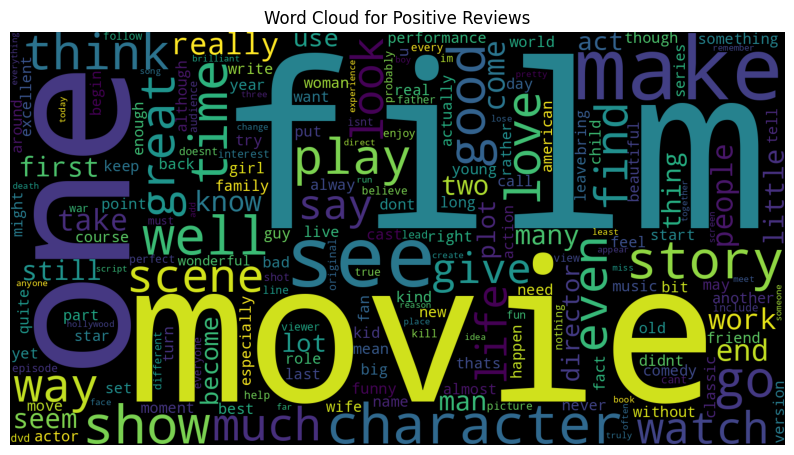

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to get only positive reviews
positive_reviews = dataset[dataset['sentiment'] == 'positive']
positive_sentences = positive_reviews['review']

# Join the positive sentences into a single string
pos = ' '.join(map(str, positive_sentences))

# Create a WordCloud for positive reviews
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                          min_font_size=15).generate(pos)

# Display the WordCloud for positive reviews
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

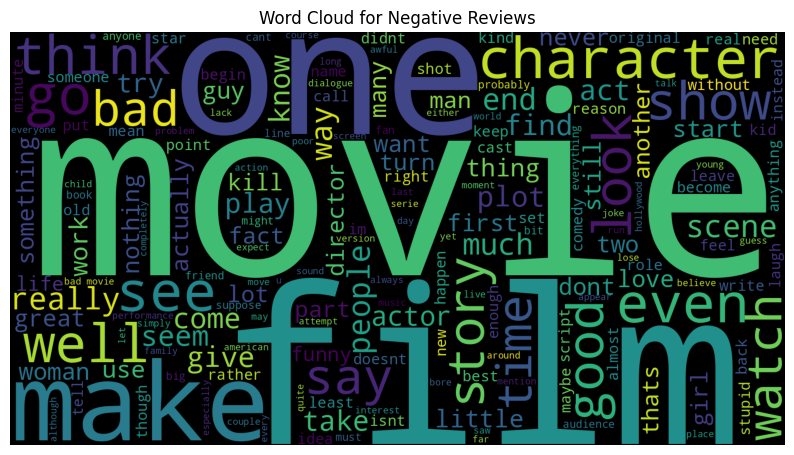

In [ ]:
# Filter the DataFrame to get only negative reviews
negative_reviews = dataset[dataset['sentiment'] == 'negative']
negative_sentences = negative_reviews['review']

# Join the positive sentences into a single string
pos = ' '.join(map(str, negative_sentences))

# Create a WordCloud for positive reviews
neg_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                          min_font_size=15).generate(pos)

# Display the WordCloud for negative reviews
plt.figure(figsize=(10, 10))
plt.imshow(neg_wordcloud)
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

## Top 25 words in each sentiment

In [ ]:
from collections import Counter

# Filter the DataFrame to get only negative reviews
negative_reviews = dataset[dataset['sentiment'] == 'negative']
negative_sentences = negative_reviews['review']

# Tokenize negative reviews
negative_words = [word for review in negative_sentences for word in review.split()]

# Count word frequencies in negative reviews
negative_word_counts = Counter(negative_words)

# Get the top 25 words for negative sentiment
top_negative_words = negative_word_counts.most_common(25)

# Filter the DataFrame to get only positive reviews
positive_reviews = dataset[dataset['sentiment'] == 'positive']
positive_sentences = positive_reviews['review']

# Tokenize positive reviews
positive_words = [word for review in positive_sentences for word in review.split()]

# Count word frequencies in positive reviews
positive_word_counts = Counter(positive_words)

# Get the top 25 words for positive sentiment
top_positive_words = positive_word_counts.most_common(25)

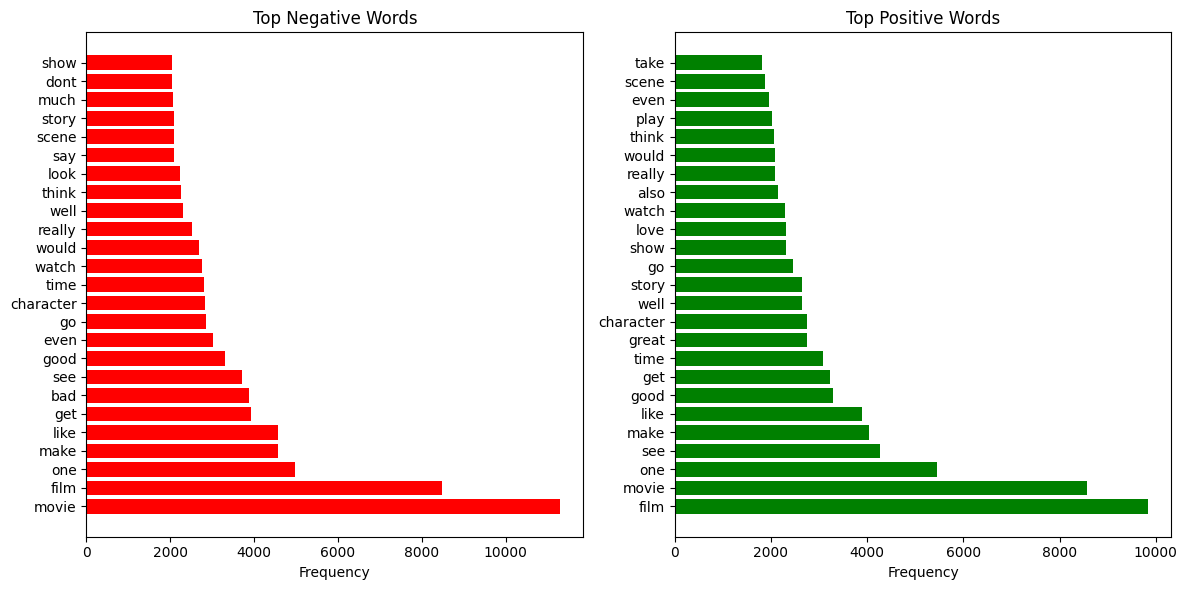

In [ ]:
# Extract the top words and their counts
top_negative_words, negative_counts = zip(*top_negative_words)
top_positive_words, positive_counts = zip(*top_positive_words)

# Create subplots for positive and negative word frequencies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_negative_words, negative_counts, color='red')
plt.xlabel('Frequency')
plt.title('Top Negative Words')

plt.subplot(1, 2, 2)
plt.barh(top_positive_words, positive_counts, color='green')
plt.xlabel('Frequency')
plt.title('Top Positive Words')

plt.tight_layout()
plt.show()

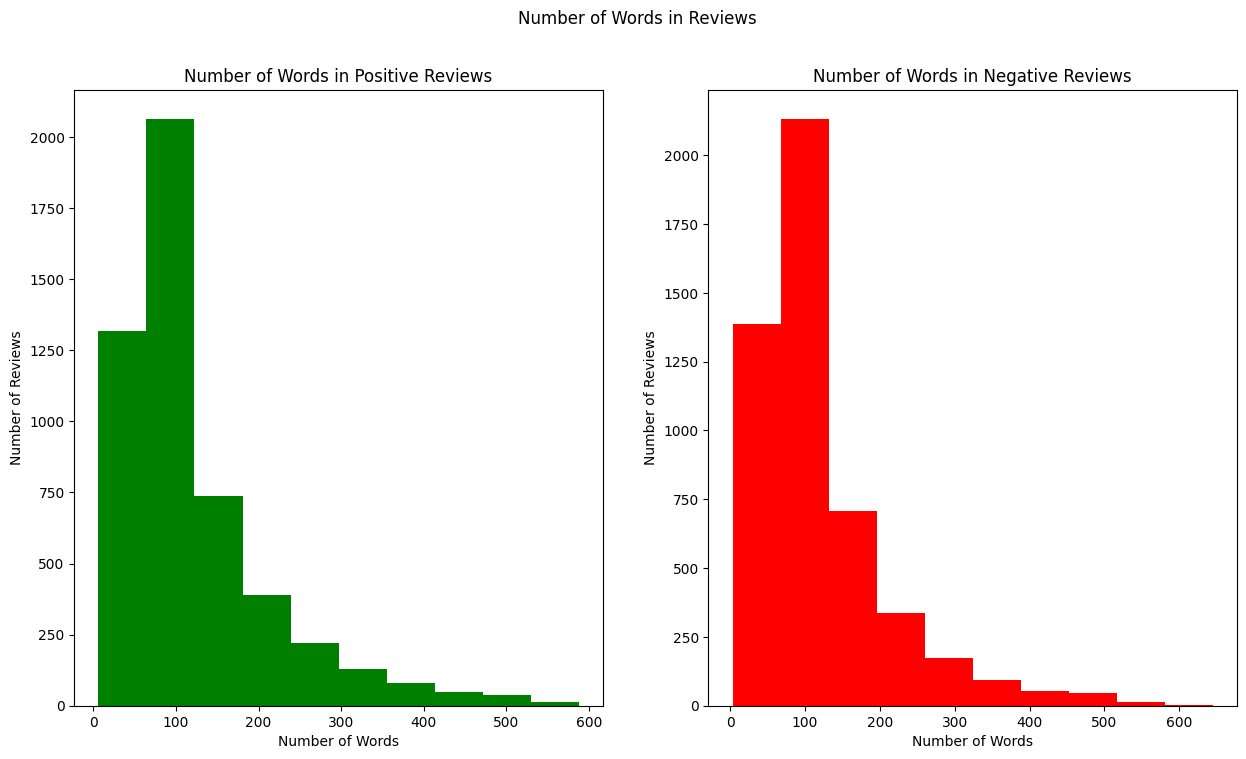

In [ ]:
# Create subplots for positive and negative sentiments
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Positive Sentiment
pos_reviews = dataset[dataset['sentiment'] == 'positive']
pos_word = pos_reviews['review'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word, color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
pos_ax.set_xlabel('Number of Words')
pos_ax.set_ylabel('Number of Reviews')

# Negative Sentiment
neg_reviews = dataset[dataset['sentiment'] == 'negative']
neg_word = neg_reviews['review'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word, color='red')
neg_ax.set_title('Number of Words in Negative Reviews')
neg_ax.set_xlabel('Number of Words')
neg_ax.set_ylabel('Number of Reviews')

figure.suptitle('Number of Words in Reviews')
plt.show()

<ipython-input-43-9a5b0265b137>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-43-9a5b0265b137>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




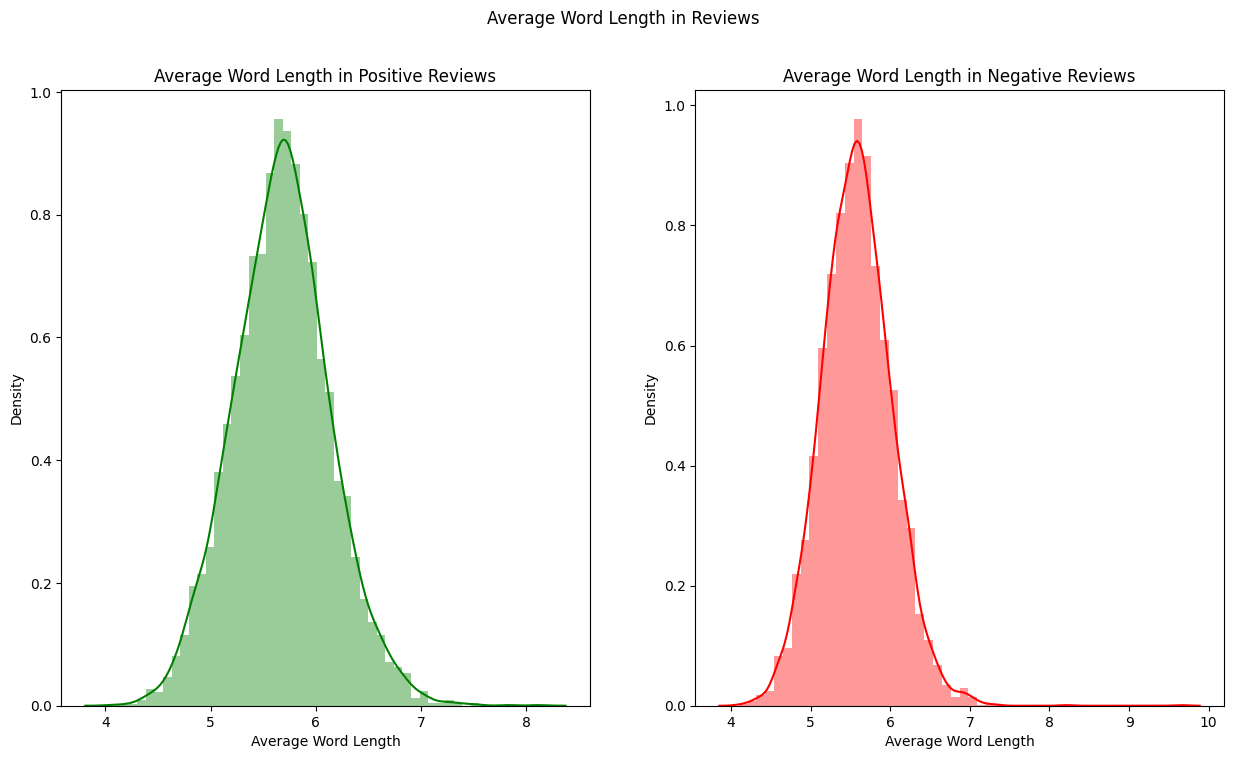

In [ ]:
import seaborn as sns
# Create subplots for positive and negative sentiments
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Positive Sentiment
pos_reviews = dataset[dataset['sentiment'] == 'positive']
pos_word = pos_reviews['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)), ax=pos_ax, color='green')
pos_ax.set_title('Average Word Length in Positive Reviews')
pos_ax.set_xlabel('Average Word Length')
pos_ax.set_ylabel('Density')

# Negative Sentiment
neg_reviews = dataset[dataset['sentiment'] == 'negative']
neg_word = neg_reviews['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)), ax=neg_ax, color='red')
neg_ax.set_title('Average Word Length in Negative Reviews')
neg_ax.set_xlabel('Average Word Length')
neg_ax.set_ylabel('Density')

figure.suptitle('Average Word Length in Reviews')
plt.show()

In [ ]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Most Common N-Grams

## Common Bigrams

In [ ]:
# Get the most common bigrams (pairs of words) in positive sentiment reviews
most_common_bigrams = get_top_text_ngrams(dataset[dataset['sentiment'] == 'positive']['review'], 20, 2)
most_common_bigrams = dict(most_common_bigrams)

# Create a DataFrame to store the common bigrams and their counts
temp = pd.DataFrame(columns=["Common_bigrams", 'Count'])
temp["Common_bigrams"] = list(most_common_bigrams.keys())
temp["Count"] = list(most_common_bigrams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_bigrams", title='Common Bigrams in Positive Reviews',
             orientation='h', width=700, height=700, color='Common_bigrams')

fig.show()

# --------------------------------------------
# Negative

# Get the most common bigrams (pairs of words) in positive sentiment reviews
most_common_bigrams = get_top_text_ngrams(dataset[dataset['sentiment'] == 'negative']['review'], 20, 2)
most_common_bigrams = dict(most_common_bigrams)

# Create a DataFrame to store the common bigrams and their counts
temp = pd.DataFrame(columns=["Common_bigrams", 'Count'])
temp["Common_bigrams"] = list(most_common_bigrams.keys())
temp["Count"] = list(most_common_bigrams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_bigrams", title='Common Bigrams in Negative Reviews',
             orientation='h', width=700, height=700, color='Common_bigrams')

fig.show()

## Common Trigrams

In [ ]:
 #Get the most common trigrams (groups of three words) in positive sentiment reviews
most_common_trigrams = get_top_text_ngrams(dataset[dataset['sentiment'] == 'positive']['review'], 20, 3)
most_common_trigrams = dict(most_common_trigrams)

# Create a DataFrame to store the common trigrams and their counts
temp = pd.DataFrame(columns=["Common_trigrams", 'Count'])
temp["Common_trigrams"] = list(most_common_trigrams.keys())
temp["Count"] = list(most_common_trigrams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_trigrams", title='Common Trigrams in Positive Reviews',
             orientation='h', width=700, height=700, color='Common_trigrams')

fig.show()

# --------------------------------------------
# Negative

#Get the most common trigrams (groups of three words) in positive sentiment reviews
most_common_trigrams = get_top_text_ngrams(dataset[dataset['sentiment'] == 'negative']['review'], 20, 3)
most_common_trigrams = dict(most_common_trigrams)

# Create a DataFrame to store the common trigrams and their counts
temp = pd.DataFrame(columns=["Common_trigrams", 'Count'])
temp["Common_trigrams"] = list(most_common_trigrams.keys())
temp["Count"] = list(most_common_trigrams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_trigrams", title='Common Trigrams in Negative Reviews',
             orientation='h', width=700, height=700, color='Common_trigrams')

fig.show()

## Common 4-grams

In [ ]:
# Get the most common 4-grams (groups of four words) in positive sentiment reviews
most_common_4grams = get_top_text_ngrams(dataset[dataset['sentiment'] == 'positive']['review'], 20, 4)
most_common_4grams = dict(most_common_4grams)

# Create a DataFrame to store the common 4-grams and their counts
temp = pd.DataFrame(columns=["Common_4grams", 'Count'])
temp["Common_4grams"] = list(most_common_4grams.keys())
temp["Count"] = list(most_common_4grams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_4grams", title='Common 4-Grams in Positive Reviews',
             orientation='h', width=700, height=700, color='Common_4grams')

fig.show()

# --------------------------------------------
# Negative

# Get the most common 4-grams (groups of four words) in positive sentiment reviews
most_common_4grams = get_top_text_ngrams(dataset[dataset['sentiment'] == 'negative']['review'], 20, 4)
most_common_4grams = dict(most_common_4grams)

# Create a DataFrame to store the common 4-grams and their counts
temp = pd.DataFrame(columns=["Common_4grams", 'Count'])
temp["Common_4grams"] = list(most_common_4grams.keys())
temp["Count"] = list(most_common_4grams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_4grams", title='Common 4-Grams in Negative Reviews',
             orientation='h', width=700, height=700, color='Common_4grams')

fig.show()

## Common 5-grams

In [ ]:
# Get the most common 5-grams (groups of five words) in positive sentiment reviews
most_common_5grams = get_top_text_ngrams(dataset[dataset['sentiment'] == 'positive']['review'], 20, 5)
most_common_5grams = dict(most_common_5grams)

# Create a DataFrame to store the common 5-grams and their counts
temp = pd.DataFrame(columns=["Common_5grams", 'Count'])
temp["Common_5grams"] = list(most_common_5grams.keys())
temp["Count"] = list(most_common_5grams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_5grams", title='Common 5-Grams in Positive Reviews',
             orientation='h', width=700, height=700, color='Common_5grams')

fig.show()

# --------------------------------------------
# Negative

# Get the most common 5-grams (groups of five words) in positive sentiment reviews
most_common_5grams = get_top_text_ngrams(dataset[dataset['sentiment'] == 'negative']['review'], 20, 5)
most_common_5grams = dict(most_common_5grams)

# Create a DataFrame to store the common 5-grams and their counts
temp = pd.DataFrame(columns=["Common_5grams", 'Count'])
temp["Common_5grams"] = list(most_common_5grams.keys())
temp["Count"] = list(most_common_5grams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_5grams", title='Common 5-Grams in Negative Reviews',
             orientation='h', width=700, height=700, color='Common_5grams')

fig.show()

## Feature Selection Using TF-IDF

### Trigram Evaluation

In [ ]:
train,test=train_test_split(dataset,test_size=.3,random_state=42, shuffle=True)
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range=(3,3),min_df=1,max_features=500)
x_train_count = tfidfvect.fit_transform(train['review']).toarray()
x_test_count = tfidfvect.transform(test['review']).toarray()
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
from sklearn.linear_model  import LogisticRegression
from prettytable import PrettyTable

lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=10:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+----------------------+
|    Feature     |        Score         |
+----------------+----------------------+
|  10 item less  |  0.6882264807971802  |
|  10 year ago   | -0.2689389266963856  |
|  10 year old   | -0.1420777727751274  |
|  12 year old   | -0.21383647153720692 |
|  13 year old   | -0.6426126991674895  |
|  14 year old   |  0.2641728686523701  |
|  15 year old   | 0.02618323950909029  |
|  20 year ago   | -0.2370280398729068  |
|  20 year old   | 0.03771021120775288  |
|  40 year old   |  0.3149193587962345  |
| 90 minute life | -1.1550515166245165  |
+----------------+----------------------+


### 4-Gram Evaluation

In [ ]:
train,test=train_test_split(dataset,test_size=.3,random_state=42, shuffle=True)
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range=(4,4),min_df=1,max_features=500)
x_train_count = tfidfvect.fit_transform(train['review']).toarray()
x_test_count = tfidfvect.transform(test['review']).toarray()
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
from sklearn.linear_model  import LogisticRegression
from prettytable import PrettyTable

lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=10:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------------------+-----------------------+
|              Feature              |         Score         |
+-----------------------------------+-----------------------+
|          13 year old girl         |  -0.6910724418604046  |
|           15 16 year old          |  -0.2236039053369771  |
|          20 year old guy          |  -0.4105342600967364  |
|         40 year old virgin        |  0.17199578934408158  |
|      abbas khan gandhi father     |  0.28286091211428993  |
| abbott costello meet frankenstein | -0.016929078961134925 |
|      abuse model lean classic     |  -0.3090569914753277  |
|        actress ive ever see       |  -0.15098707667404057 |
|     afternoon island la grande    |  0.17481130468837144  |
|         air bud world pup         |  -0.4105342600967364  |
|       also appear star trek       |   0.6597017037834415  |
+-----------------------------------+-----------------------+


### 5-Gram Evaluation

In [ ]:
train,test=train_test_split(dataset,test_size=.3,random_state=42, shuffle=True)
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range=(5,5),min_df=1,max_features=500)
x_train_count = tfidfvect.fit_transform(train['review']).toarray()
x_test_count = tfidfvect.transform(test['review']).toarray()
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
from sklearn.linear_model  import LogisticRegression
from prettytable import PrettyTable

lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=10:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+--------------------------------------------+-----------------------+
|                  Feature                   |         Score         |
+--------------------------------------------+-----------------------+
|    18 painting subject sonheim musical     |  0.07737764799325579  |
|        abuse model lean classic car        |  -0.16152162586937807 |
|     academy award include best picture     |   0.6644126475026179  |
|  act cinematography jakes closet emotion   |   0.0956924640935968  |
| actor fan exotic romanceadventure holywood |   0.297134368985292   |
|      afternoon island la grande jatte      |  0.07737764799325579  |
|      also nominate best support actor      |   0.567715057639006   |
|         always seem one step ahead         |   0.6644126475026179  |
|       anarene texas early 50 pretty        |  -0.23535438239763284 |
|        anything else ever put film         | -0.011253944263609855 |
|         argue bike party sex kill          |  -0.28824907280103573 |
+-----

# Training With TF-IDF

In [ ]:
dataset.drop('tokenized_words', axis=1, inplace=True) # Drop tokenized_words column
dataset

,review,sentiment
0,really liked summerslam due look arena curtain...,positive
1,many television show appeal quite many differe...,positive
2,film quickly get major chase scene ever increa...,negative
3,jane austen would definitely approve onegwynet...,positive
4,expectation somewhat high go see movie think s...,negative
...,...,...
9995,although casper van dien michael rooker genera...,negative
9996,liked movie wasnt really sure start watch enjo...,positive
9997,yes nonsingaporeans cant see whats big deal fi...,positive
9998,far film go likable enough entertaining charac...,negative


In [ ]:
# Defining feature and labels
train , test = train_test_split(dataset,test_size=.3, shuffle=True) # Train Split 70-30
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3),min_df=10,max_features=5000)

x_train_tfidf = tfidfvect.fit_transform(train['review']).toarray()
x_test_tfidf = tfidfvect.transform(test['review']).toarray()

y_train = train['sentiment']
y_test = test['sentiment']

## Using Naive Bayes (Multinomial Naive Bayes)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_1 = MultinomialNB()
model_1.fit(x_train_tfidf,y_train)

MultinomialNB()

In [ ]:
y_pred = model_1.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8356713426853707

## Using SVM

In [ ]:
from sklearn.svm import SVC

model_2 = SVC()
model_2.fit(x_train_tfidf, y_train)

SVC()

In [ ]:
y_pred = model_2.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8590514362057449

## Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier()
model_3.fit(x_train_tfidf, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model_3.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8323313293253173

## Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_4 = KNeighborsClassifier()
model_4.fit(x_train_tfidf, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model_4.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7120908483633934

# Hyperparameter Tuning

## SVM

In [ ]:
param_grid = {
    'C': [1, 10, 100],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear','rbf']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)

In [ ]:
grid_svm.fit(x_train_tfidf, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.848 total time= 1.5min
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.849 total time= 1.5min
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.875 total time= 1.6min
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.853 total time= 1.5min
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.861 total time= 1.5min
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.853 total time= 2.6min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.863 total time= 2.6min
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.879 total time= 2.6min
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.861 total time= 2.6min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.864 total time= 2.7min
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.848 total time= 1.5min
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
grid_svm.best_params_ # Get the best combination of parameters

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

## Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
param_grid = {

    'alpha': [0.1, 0.5, 1.0],            # Smoothing parameter
    'fit_prior': [True, False],          # Learn class priors or not
    'class_prior': [None, [0.5, 0.5], [0.7, 0.3]]  # Prior probabilities
}


In [ ]:
grid_naive_bayes = GridSearchCV(MultinomialNB(), param_grid, refit=True, verbose = 3)

In [ ]:
grid_naive_bayes.fit(x_train_tfidf, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.834 total time=   0.3s
[CV 2/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.848 total time=   0.2s
[CV 3/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.860 total time=   0.3s
[CV 4/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.844 total time=   0.3s
[CV 5/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.836 total time=   0.3s
[CV 1/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.833 total time=   0.3s
[CV 2/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.847 total time=   0.3s
[CV 3/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.863 total time=   0.3s
[CV 4/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.843 total time=   0.3s
[CV 5/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.836 total time=   0.2s
[CV 1/5] END alpha=0.1, class_prio

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0],
                         'class_prior': [None, [0.5, 0.5], [0.7, 0.3]],
                         'fit_prior': [True, False]},
             verbose=3)

In [ ]:
grid_naive_bayes.best_params_ # Get the best combination of parameters

{'alpha': 1.0, 'class_prior': None, 'fit_prior': False}

## Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ["gini", "entropy", "log_loss"]
}

In [ ]:
grid_random_forest = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose = 3)

In [ ]:
grid_random_forest.fit(x_train_tfidf, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...criterion=gini, n_estimators=50;, score=0.817 total time=   7.1s
[CV 2/5] END ...criterion=gini, n_estimators=50;, score=0.818 total time=   5.9s
[CV 3/5] END ...criterion=gini, n_estimators=50;, score=0.844 total time=   7.0s
[CV 4/5] END ...criterion=gini, n_estimators=50;, score=0.816 total time=   6.0s
[CV 5/5] END ...criterion=gini, n_estimators=50;, score=0.837 total time=   6.4s
[CV 1/5] END ..criterion=gini, n_estimators=100;, score=0.817 total time=  12.0s
[CV 2/5] END ..criterion=gini, n_estimators=100;, score=0.833 total time=  12.7s
[CV 3/5] END ..criterion=gini, n_estimators=100;, score=0.845 total time=  12.8s
[CV 4/5] END ..criterion=gini, n_estimators=100;, score=0.850 total time=  14.3s
[CV 5/5] END ..criterion=gini, n_estimators=100;, score=0.831 total time=  12.6s
[CV 1/5] END ..criterion=gini, n_estimators=150;, score=0.813 total time=  18.1s
[CV 2/5] END ..criterion=gini, n_estimators=150;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 150]},
             verbose=3)

In [ ]:
grid_random_forest.best_params_ # Get the best combination of parameters

{'criterion': 'gini', 'n_estimators': 150}

## KNN

In [ ]:
param_grid = {
    'n_neighbors': [3, 5],
    'metric': ['euclidean', 'cosine']
}

In [ ]:
grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose = 3)

In [ ]:
grid_KNN.fit(x_train_tfidf, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.677 total time=   3.4s
[CV 2/5] END ...metric=euclidean, n_neighbors=3;, score=0.686 total time=   4.6s
[CV 3/5] END ...metric=euclidean, n_neighbors=3;, score=0.681 total time=   2.9s
[CV 4/5] END ...metric=euclidean, n_neighbors=3;, score=0.710 total time=   2.8s
[CV 5/5] END ...metric=euclidean, n_neighbors=3;, score=0.679 total time=   2.9s
[CV 1/5] END ...metric=euclidean, n_neighbors=5;, score=0.690 total time=   4.0s
[CV 2/5] END ...metric=euclidean, n_neighbors=5;, score=0.708 total time=   3.8s
[CV 3/5] END ...metric=euclidean, n_neighbors=5;, score=0.708 total time=   2.9s
[CV 4/5] END ...metric=euclidean, n_neighbors=5;, score=0.715 total time=   2.9s
[CV 5/5] END ...metric=euclidean, n_neighbors=5;, score=0.721 total time=   3.0s
[CV 1/5] END ......metric=cosine, n_neighbors=3;, score=0.677 total time=   4.9s
[CV 2/5] END ......metric=cosine, n_neighbors=3;,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cosine'],
                         'n_neighbors': [3, 5]},
             verbose=3)

In [ ]:
grid_KNN.best_params_ # Get the best combination of parameters

{'metric': 'euclidean', 'n_neighbors': 5}

# Evaluation Metrics

## SVM

In [ ]:
# Use best estimator from each algorithm
grid_svm.best_estimator_ # Get the best model based on parameters - ONLY works when refit = True

SVC(C=10, gamma=1)

### Classification Report (Accuracy, Precision, Recall, F1 Score)

In [ ]:
grid_svm_pred = grid_svm.predict(x_test_tfidf)
print(classification_report(y_test, grid_svm_pred))

              precision    recall  f1-score   support

    negative       0.86      0.85      0.86      1441
    positive       0.87      0.88      0.87      1553

    accuracy                           0.87      2994
   macro avg       0.87      0.87      0.87      2994
weighted avg       0.87      0.87      0.87      2994



### Confusion Matrix

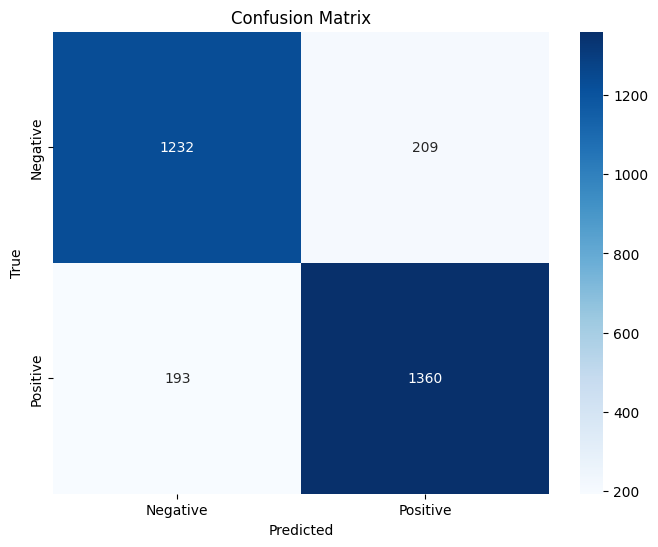

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, grid_svm_pred)

# Define labels for the matrix
labels = ['Negative', 'Positive']  # Assuming binary classification

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes

In [ ]:
# Use best estimator from each algorithm
grid_naive_bayes.best_estimator_ # Get the best model based on parameters - ONLY works when refit = True

MultinomialNB(alpha=1)

### Classification Report (Accuracy, Precision, Recall, F1 Score)

In [ ]:
grid_naive_bayes_pred = grid_naive_bayes.predict(x_test_tfidf)
print(classification_report(y_test, grid_naive_bayes_pred))

              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      1441
    positive       0.84      0.84      0.84      1553

    accuracy                           0.84      2994
   macro avg       0.84      0.84      0.84      2994
weighted avg       0.84      0.84      0.84      2994



### Confusion Matrix

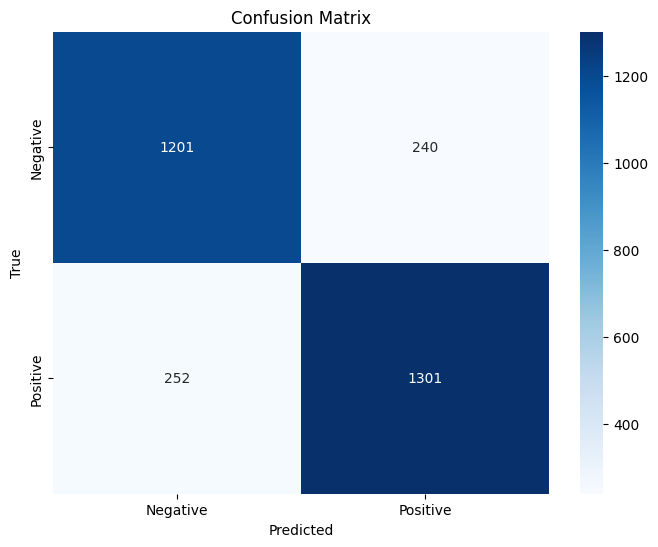

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, grid_naive_bayes_pred)

# Define labels for the matrix
labels = ['Negative', 'Positive']  # Assuming binary classification

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [ ]:
# Use best estimator from each algorithm
grid_random_forest.best_estimator_ # Get the best model based on parameters - ONLY works when refit = True

RandomForestClassifier(n_estimators=150)

### Classification Report (Accuracy, Precision, Recall, F1 Score)

In [ ]:
grid_random_forest_pred = grid_random_forest.predict(x_test_tfidf)
print(classification_report(y_test, grid_random_forest_pred))

              precision    recall  f1-score   support

    negative       0.80      0.85      0.82      1441
    positive       0.85      0.81      0.83      1553

    accuracy                           0.83      2994
   macro avg       0.83      0.83      0.83      2994
weighted avg       0.83      0.83      0.83      2994



### Confusion Matrix

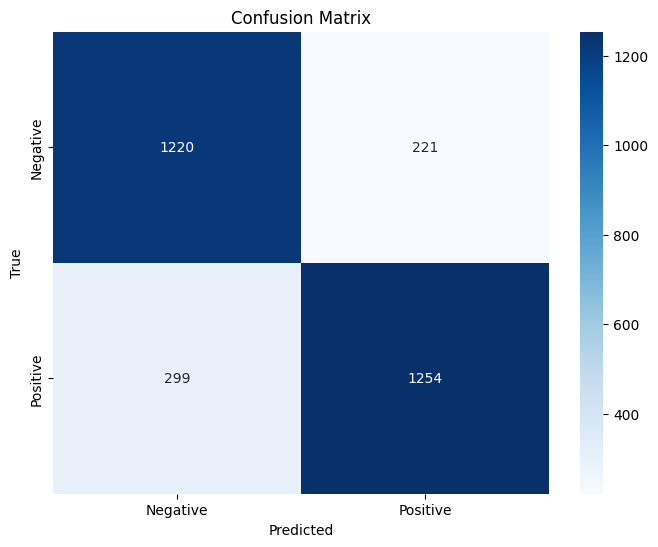

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, grid_random_forest_pred)

# Define labels for the matrix
labels = ['Negative', 'Positive']  # Assuming binary classification

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## KNN

In [ ]:
# Use best estimator from each algorithm
grid_KNN.best_estimator_ # Get the best model based on parameters - ONLY works when refit = True

KNeighborsClassifier(metric='euclidean')

### Classification Report (Accuracy, Precision, Recall, F1 Score)

In [ ]:
grid_KNN_pred = grid_KNN.predict(x_test_tfidf)
print(classification_report(y_test, grid_KNN_pred))

              precision    recall  f1-score   support

    negative       0.71      0.68      0.70      1441
    positive       0.71      0.74      0.73      1553

    accuracy                           0.71      2994
   macro avg       0.71      0.71      0.71      2994
weighted avg       0.71      0.71      0.71      2994



### Confusion Matrix

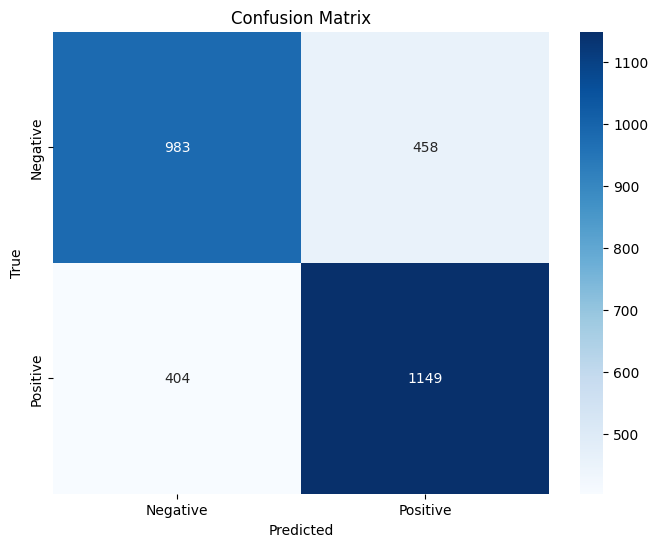

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, grid_KNN_pred)

# Define labels for the matrix
labels = ['Negative', 'Positive']  # Assuming binary classification

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()